<h1>Neural Network from Scratch with NumPy</h1>
<h2>Jack Ross</h2><br>

![Neural Network](https://www.cdn.geeksforgeeks.org/wp-content/uploads/neuralNet.png)

<h2>So what is a neural network?</h2>
<p>Simply put, a neural network is a mathematical function that maps a given input to a desired output.<br>
A neural network consists of the following parts:<br>
- Input layer, x<br>
- Hidden layers<br>
- Output layer yÌ‚<br>
- Weights and biases betweeen each later, W and b<br>
- Activation function for each hidden layer</p><br>

<h2>To fully understand neural networks, lets build a few from scratch.<br><br>
The first one we'll be building is called a perceptron.</h2>
<p>A perceptron is able to classify linearly separable data.
    
Linearly separable data is the type of data which can be separated by a hyperplane in n-dimensional space.</p>
<br><br>
<h2>Our goal is to predict if a random person is obese or not.<br>

Here is our dataset:<br></h2>
![dataset](https://i.gyazo.com/e46cef207f88d157c5d4eddab4b0b077.png)
<br>
<p>In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.</p>

<h1>Feed Forward</h1>
<p>Since we have 3 features in our dataset (smoking, obesity, exercise) we will have 3 nodes in the first layer (known as the input layer) in our network. For each input feature, we have 1 weight.</p>

<h2>Feed Forward Step 1: Calculate the dot product between input and weights</h2>
<p>The nodes in the input layer (smoking, obesity, exercise) are connected with the output layer with 3 weight parameters. In the output layer, the values in the input nodes are multiplied with their corresponding weights and are added together. Finally, the bias term is added to the sum.</p>
<h3>Bias</h3>
<p>Suppose we have a person in our dataset who doesn't smoke, isn't obese, and doesn't exercise, the sum of the products of the input nodes and weights will be zero everytime. Therefore, to be able to make predictions, even if we do not have any non zero data about he person, we need a bias. In step one of Feed Forward, we perform the following calculations:</p>

![step 1 calculations](https://i.gyazo.com/b67dcf93fd727bb8eafceac325f5040b.png)

<h2>Feed Forward Step 2: Pass the result from step 1 through an activation function</h2>
<p>The result form step one could be any set of values but for out output we need values in the form of 1 and 0 to keep the same format. We need an activation function to squish the input value between 0 and 1. One activation function we'll be looking at is the sigmoid function.</p>

<h3>Activation Functions: Sigmoid</h3>
<p>The sigmoid function has a characteristic S-shaped or "sigmoid" curve and returns 0.5 when the input is 0. It returns a value close to 1 if the input is a large positive number. In case of negative input, the sigmoid function outputs a value close to 0. We can represent the sigmoid activation function mathematically as:</p>

![sigmoid math](https://i.gyazo.com/3957ff564628de0add993705b961ed05.png)

<h2>Let's plot the sigmoid function:</h2>

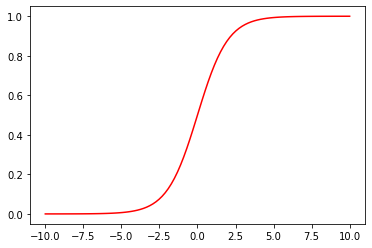

In [2]:
import numpy as np
input = np.linspace(-10, 10, 100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

from matplotlib import pyplot as plt
plt.plot(input, sigmoid(input), c="r")

<h2>Feed Forward Summary</h2>
<p>1.) Find the dot product of the input feature matrix and the weight matrix.<br>
   2.) Pass the result from the output through an activation function. (Sigmoid)<br>
   3.) The result of the activation function is the predicted output for the input features.</p>
   
![feed forward](https://dzone.com/storage/temp/7913024-general.png)

<h1>Back Propagation</h1>
<p>Before your neural network makes any predictions, it makes a lot of random ones which are nowhere near correct. We let it make random predictions about the output in the beginning and then we compare the predicted output against the actual output. The we fine-tune our weights and the bias in such a way that our predicted output becomes closer to the actual output. 
    
This is known as training the neural network.</p>

<h3>Back Propagation Step 1: Calculating the cost</h3>
<p>First we must find the "cost" of the predictions. The cost can be calculated by finding the difference between the predicted output and the actual output. The higher the difference, the higher the cost.
    
<h4>Cost Function: Mean Squared Error</h4>
<p>We will use the mean squared error function to find the cost of our predictions. It can be represented mathematically as:</p>

![cost function](https://i.gyazo.com/65c4a711b0b94000a4ee5fa7f0eb59d6.png)

<br>

<h3>Back Propagation Step 2: Minimizing the cost</h3>
<p>To minimize the cost, we need to find the bias and weight values that make the cost function as small as possible. The smaller the cost, the more correct the predictions are. Since this is an "optimization problem" (problem of finding the best solution from all feasible solutions) where we have to find the "function minima" (the smallest value of the function), we can use the gradient decent algorithm. Gradient decent can be mathematically expressed as:</p>

![Gradient decent](https://i.gyazo.com/36a8c9fb11f15b27e0072866efd09bde.png)

<p>Here in the above equation, J is the cost function. Basically what the above equation says is: find the partial derivative of the cost function with respect to each weight and bias and subtract the result from the existing weight values to get the new weight values.

The derivative of a function gives us its slope at any given point. To find if the cost increases or decreases, given the weight value, we can find the derivative of the function at that particular weight value. If the cost increases with the increase in weight, the derivative will return a positive value which will then be subtracted from the existing value.

On the other hand, if the cost is decreasing with an increase in weight, a negative value will be returned, which will be added to the existing weight value since negative into negative is positive.

In Equation 1, we can see there is an alpha symbol, which is multiplied by the gradient. This is called the learning rate. We need to keep executing Equation 1 until we get values for bias and weights, for which the cost function returns a value close to zero.</p>

<h1>Implementation</h1>
<br>
<h3>First we create our feature set and the corresponding labels.</h3>

In [3]:
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
labels = np.array([[1,0,0,1,1]])
labels = labels.reshape(5,1)

<h3>Define the hyper parameters</h3>
<p>We'll use the random.seed function so that we can get the same random values whenever the script is executed. We initialize the weights with normally distributed random numbers. Since we have 3 input features (smoking, obesity, exercise), we will have a vector of 3 weights. We then initialize the bias value with another random number and then set the learning rate to 0.05.</p></p>

In [4]:
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05

<h3>Define (sigmoid) activation function</h3>

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

<h3>Define the (sigmoid) activation functions derivative</h3>
<p>The derivative is simply: sigmoid(x) * sigmoid(1-x)</p>

In [6]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

<h3>Training the neural network</h3>
<p>1.) We define the number of epochs. (An epoch is the number of times we want to train the algorithm on our data)<br>
   2.) Store the values from the feature_set to the input variable. (This is step 1 of Feed Forward)<br>
   3.) Pass the dot product through the sigmoid activation function. (This is step 2 of Feed Forward)<br>
   4.) Find the error and print it. (This is step 1 of Back Propagation)<br>
       - We need to differentiate this function with respect to each weight.<br>
       - Do this using the chain rule of differentiation. Here:<br>
    
   ![chain rule](https://i.gyazo.com/2850b4b715d853321471ebe2135237c2.png)
   
   4.5) Next we have to find:
   
   ![d_pred](https://i.gyazo.com/a2fd22bc8a4605edc910c4af08cee1db.png)
   
   Here "d_pred" is just the sigmoid function and we have differentiated it with respect to the input dot product "z".
   
   5.) Finally we need to find:
   
   ![d_z/dw](https://i.gyazo.com/7ae7e26c199cf88df53681c6dda5e239.png)
   
   6.) We have the z_delta variable, which contains the product of dcost_dpred and dpred_dz. Instead of looping through each record and multiplying the input with corresponding z_delta, we take the transpose of the input feature matrix and multiply it with the z_delta. Finally, we multiply the learning rate variable lr with the derivative to increase the speed of convergence.

</p>

In [7]:
for epoch in range(20000):
    inputs = feature_set

    # feedforward step1
    XW = np.dot(feature_set, weights) + bias

    #feedforward step2
    z = sigmoid(XW)


    # backpropagation step 1
    error = z - labels

    print(error.sum())

    # backpropagation step 2
    dcost_dpred = error
    dpred_dz = sigmoid_der(z)

    z_delta = dcost_dpred * dpred_dz

    inputs = feature_set.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

1.1484765089981492
1.1370374057501034
1.1255946731475135
1.1141521191251875
1.1027135368122778
1.0912826991625884
1.0798633536714135
1.0684592171946765
1.057073970885539
1.0457112552629333
1.0343746654256973
1.0230677464251738
1.011793988808234
1.0005568243417682
0.9893596219286931
0.97820568372455
0.9670982414627042
0.9560404529951445
0.9450353990547999
0.9340860802442471
0.9231954142546343
0.9123662333175894
0.9016012818918814
0.8909032145855899
0.8802745943135835
0.8697178906891608
0.8592354786478364
0.8488296373003921
0.8385025490115107
0.8282562986995811
0.8180928733525368
0.8080141617539774
0.7980219544132175
0.788117943692388
0.7783037241232473
0.7685807929059396
0.7589505505815884
0.7494143018703172
0.739973256666038
0.7306285311791626
0.7213811492182582
0.7122320436015701
0.7031820576892992
0.6942319470275317
0.6853823810947425
0.6766339451419043
0.6679871421173361
0.6594423946675809
0.651000047205802
0.6426603680393705
0.6344235515485803
0.6262897204086635
0.618258927847567
0

0.013117354702279926
0.013112053483604169
0.013106756593239677
0.013101464025882137
0.013096175776236604
0.013090891839015434
0.013085612208940334
0.013080336880742144
0.013075065849159406
0.013069799108939656
0.01306453665483881
0.013059278481621306
0.013054024584060853
0.01304877495693793
0.013043529595043069
0.013038288493174927
0.013033051646140034
0.013027819048754163
0.01302259069584022
0.013017366582231432
0.013012146702767888
0.013006931052297555
0.013001719625678837
0.012996512417776662
0.012991309423464992
0.012986110637626183
0.012980916055150116
0.012975725670935662
0.012970539479890061
0.012965357476927591
0.012960179656971882
0.012955006014955556
0.012949836545816579
0.012944671244503894
0.012939510105973079
0.012934353125188341
0.012929200297121746
0.012924051616753834
0.012918907079072312
0.012913766679074484
0.012908630411764599
0.012903498272154479
0.012898370255265829
0.012893246356126209
0.012888126569772423
0.01288301089124877
0.012877899315607982
0.012872791837910

0.006553486694025751
0.006552185203895992
0.006550884237191426
0.006549583793594105
0.006548283872788156
0.006546984474456688
0.006545685598283141
0.006544387243951566
0.006543089411146605
0.0065417920995527665
0.0065404953088543105
0.0065391990387373145
0.006537903288885878
0.006536608058986267
0.006535313348724023
0.00653401915778537
0.006532725485856497
0.006531432332623911
0.006530139697774627
0.006528847580995575
0.006527555981974076
0.00652626490039792
0.006524974335954427
0.006523684288332353
0.006522394757218802
0.006521105742303919
0.006519817243275633
0.006518529259823429
0.006517241791635972
0.006515954838403573
0.0065146683998154875
0.006513382475562338
0.006512097065333899
0.006510812168821253
0.00650952778571455
0.006508243915705869
0.0065069605584853266
0.006505677713745758
0.006504395381178189
0.0065031135604745535
0.006501832251327652
0.00650055145342978
0.006499271166473412
0.006497991390152641
0.006496712124159629
0.006495433368188537
0.006494155121932993
0.006492877

0.004387434982131289
0.004386857505343761
0.004386280182445305
0.004385703013374265
0.004385125998068982
0.004384549136467741
0.004383972428508794
0.0043833958741304885
0.004382819473271387
0.004382243225869501
0.004381667131863713
0.004381091191192399
0.004380515403793701
0.004379939769606607
0.004379364288569651
0.004378788960620994
0.004378213785699827
0.004377638763744519
0.004377063894693889
0.004376489178486532
0.004375914615061531
0.004375340204357692
0.0043747659463131
0.004374191840867465
0.004373617887959182
0.004373044087527908
0.004372470439511965
0.004371896943850571
0.004371323600482695
0.004370750409347153
0.004370177370383588
0.0043696044835306695
0.004369031748727988
0.0043684591659142145
0.0043678867350290945
0.0043673144560117914
0.004366742328801226
0.004366170353336852
0.004365598529558215
0.0043650268574048565
0.004364455336816061
0.004363883967730901
0.004363312750089495
0.00436274168383087
0.004362170768894731
0.004361600005220706
0.004361029392748655
0.00436045

0.0033040548811107094
0.0033037296362818797
0.003303404456245114
0.003303079340981379
0.0033027542904713325
0.003302429304695608
0.003302104383634437
0.003301779527269018
0.0033014547355794677
0.0033011300085464337
0.0033008053461503623
0.0033004807483720255
0.0033001562151924874
0.0032998317465917776
0.003299507342550665
0.003299183003049759
0.003298858728070248
0.0032985345175917877
0.003298210371596208
0.003297886290063303
0.0032975622729740986
0.003297238320309176
0.003296914432049502
0.003296590608175283
0.003296266848667944
0.0032959431535072997
0.003295619522674754
0.0032952959561510856
0.0032949724539166267
0.0032946490159524097
0.0032943256422389364
0.0032940023327574855
0.0032936790874881668
0.003293355906412356
0.003293032789510684
0.0032927097367634398
0.003292386748152045
0.0032920638236571334
0.003291740963259477
0.0032914181669398968
0.003291095434679297
0.003290772766458408
0.00329045016225845
0.0032901276220599525
0.003289805145843483
0.003289482733590452
0.00328916038

0.0027617390923069425
0.00276151280789233
0.0027612865609849754
0.0027610603515762534
0.0027608341796565537
0.002760608045216384
0.0027603819482464043
0.002760155888737327
0.002759929866679816
0.002759703882064646
0.0027594779348820986
0.00275925202512306
0.002759026152778128
0.0027588003178382163
0.0027585745202937523
0.002758348760135365
0.0027581230373538573
0.0027578973519400106
0.0027576717038839058
0.002757446093176949
0.002757220519809679
0.00275699498377268
0.00275676948505664
0.002756544023652073
0.0027563185995498167
0.0027560932127405763
0.0027558678632152375
0.0027556425509643045
0.002755417275978375
0.0027551920382485537
0.002754966837764966
0.0027547416745191886
0.0027545165485010348
0.002754291459701831
0.0027540664081120818
0.0027538413937227245
0.0027536164165239893
0.0027533914765069667
0.0027531665736626743
0.0027529417079811547
0.0027527168794541854
0.0027524920880713753
0.002752267333824103
0.0027520426167031223
0.002751817936698892
0.002751593293802517
0.002751368

0.002293028437217945
0.0022928730989489783
0.002292717781959497
0.0022925624862451567
0.0022924072118016524
0.002292251958624326
0.002292096726708947
0.002291941516050673
0.002291786326646103
0.0022916311584901747
0.0022914760115786293
0.002291320885907111
0.0022911657814708754
0.00229101069826625
0.0022908556362882283
0.002290700595533022
0.002290545575995645
0.0022903905776722917
0.00229023560055815
0.002290080644648678
0.002289925709940459
0.002289770796428236
0.002289615904107374
0.002289461032974966
0.0022893061830250513
0.002289151354254195
0.002288996546657377
0.0022888417602306838
0.0022886869949703646
0.0022885322508707593
0.0022883775279282197
0.0022882228261385563
0.0022880681454964524
0.002287913485999212
0.00228775884764066
0.002287604230417864
0.0022874496343254606
0.0022872950593601712
0.0022871405055164655
0.0022869859727908427
0.0022868314611784856
0.002286676970675342
0.0022865225012771214
0.0022863680529791822
0.0022862136257770106
0.002286059219667118
0.002285904834

0.0019615223904596753
0.0019614091075109384
0.001961295837786488
0.001961182581285031
0.00196106933800343
0.001960956107939813
0.00196084289109171
0.0019607296874567023
0.00196061649703258
0.001960503319817392
0.0019603901558079943
0.0019602770050023473
0.001960163867398869
0.001960050742994244
0.0019599376317866284
0.0019598245337739285
0.001959711448953235
0.0019595983773227806
0.0019594853188796765
0.0019593722736223358
0.00195925924154757
0.00195914622265371
0.001959033216938671
0.0019589202243993423
0.001958807245033658
0.00195869427883966
0.0019585813258149107
0.0019584683859568946
0.0019583554592633307
0.0019582425457321407
0.0019581296453606064
0.0019580167581469948
0.001957903884088341
0.0019577910231827547
0.0019576781754279474
0.0019575653408215373
0.0019574525193611393
0.0019573397110440906
0.0019572269158689877
0.001957114133832951
0.001957001364933937
0.00195688860916895
0.0019567758665363973
0.001956663137033632
0.0019565504206587453
0.001956437717408723
0.00195632502728

0.0017095319358377565
0.0017094461391164491
0.0017093603510966032
0.0017092745717761718
0.0017091888011544903
0.001709103039230133
0.0017090172860009765
0.0017089315414666288
0.001708845805625206
0.0017087600784759759
0.0017086743600165863
0.0017085886502466834
0.0017085029491645636
0.001708417256768983
0.0017083315730589237
0.0017082458980320278
0.0017081602316880579
0.0017080745740248801
0.0017079889250420453
0.0017079032847371993
0.0017078176531103492
0.0017077320301584695
0.0017076464158817823
0.0017075608102782962
0.0017074752133464342
0.0017073896250854419
0.0017073040454936347
0.0017072184745694635
0.0017071329123125051
0.0017070473587203205
0.0017069618137923528
0.0017068762775268621
0.0017067907499231719
0.00170670523097898
0.0017066197206937299
0.0017065342190659
0.001706448726093969
0.0017063632417769724
0.0017062777661128927
0.00170619229910135
0.0017061068407405906
0.0017060213910293134
0.001705935949965886
0.001705850517549342
0.0017057650937783927
0.0017056796786519592
0

<h3>Predict the value of a single instance</h3>
<p>Suppose we have a record of a patient that comes in who smokes, is not obese, and doesn't exercise. Let's find if he is likely to be diabetic or not. The input feature will look like this: [1,0,0].</p>

In [8]:
single_point = np.array([1,0,0])
result = sigmoid(np.dot(single_point, weights) + bias)
print(result)

[0.00707584]


<p>You can see that the person is likely not diabetic since the value is much closer to 0 than 1.

Now let's test another person who doesn't, smoke, is obese, and doesn't exercises. The input feature vector will be [0,1,0].</p>

In [9]:
single_point = np.array([0,1,0])
result = sigmoid(np.dot(single_point, weights) + bias)
print(result)

[0.99837029]


<p>You can see that the value is very close to 1, which is likely due to the person's obesity.</p>

<h1>Conclusion</h1>
<p>You did it! We created a very simple neural network with one input and one output layer from scratch in Python. Such a neural network is simply called a perceptron. A perceptron is able to classify linearly separable data like what we used for our input feature vector. Come to my page soon to see more complex models from scratch!</p>